# Fig 1 Supplementary

In [39]:
import numpy as np
import matplotlib.pylab as plt
import delfi.distribution as dd
import time
from copy import deepcopy
import sys
sys.path.append("../../setup")
sys.path.append("../../simulator")
sys.path.append("../../inference")
sys.path.append("../../visualization")
sys.path.append("../../utils")
sys.path.append("../")

import netio
import viz
import viz_samples_thesis
import importlib
from compare_samples import get_dist, evaluate_summ_stats
import viz_samples_thesis
import train_utils as tu
import startEndUtils as seu
from find_pyloric import merge_samples, params_are_bounded
import dill as pickle
import matplotlib as mpl

from common import col, svg, samples_nd
from delfi.utils.conditional_density import eval_conditional_density, conditional_correlation, conditional_mutual_information, buildCondCovMatrix, partialCorrelation

date_today = '1908208'

PANEL_A1 = 'svg/panel_a1.svg'
PANEL_A2 = 'svg/panel_a2.svg'
PANEL_A3 = 'svg/panel_a3.svg'
PANEL_A4 = 'svg/panel_a4.svg'
PANEL_A5 = 'svg/panel_a5.svg'

PANEL_B1 = 'svg/panel_b1.svg'
PANEL_B2 = 'svg/panel_b2.svg'
PANEL_B3 = 'svg/panel_b3.svg'
PANEL_B4 = 'svg/panel_b4.svg'
PANEL_B5 = 'svg/panel_b5.svg'

PANEL_C1 = 'svg/panel_c1.svg'
PANEL_C2 = 'svg/panel_c2.svg'
PANEL_C3 = 'svg/panel_c3.svg'
PANEL_C4 = 'svg/panel_c4.svg'
PANEL_C5 = 'svg/panel_c5.svg'

PANEL_D1 = 'svg/panel_d1.svg'
PANEL_D2 = 'svg/panel_d2.svg'
PANEL_D3 = 'svg/panel_d3.svg'
PANEL_D4 = 'svg/panel_d4.svg'
PANEL_D5 = 'svg/panel_d5.svg'

#PANEL_C2 = 'svg/panel_c2.svg'
#PANEL_C3 = 'svg/panel_c3.svg'
#PANEL_C4 = 'svg/panel_c4.svg'

PANEL_suppA = 'svg/panel_supp_a.svg'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
params = netio.load_setup("train_31D_15deg_R1_paper")

In [41]:
date_today = '190807'
import dill as pickle
with open('../../thesis_results/temperature/nets/R1_11deg/191031_204070samples_seed1_Exper11deg_larger.pkl', 'rb') as file:
    inf_SNPE_MAF_11, log, params_11 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R2_15deg/191031_016_seed1_Exper15deg.pkl', 'rb') as file:
    inf_SNPE_MAF_15, log, params_15 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R3_19deg/191103_seed1_Exper19deg.pkl', 'rb') as file:
    inf_SNPE_MAF_19, log, params_19 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R4_23deg/191106_seed1_Exper23deg.pkl', 'rb') as file:
    inf_SNPE_MAF_23, log, params_23 = pickle.load(file)
with open('../../thesis_results/temperature/nets/R5_27deg/191112_seed1_Exper27deg.pkl', 'rb') as file:
    inf_SNPE_MAF_27, log, params_27 = pickle.load(file)

In [42]:
prior = netio.create_prior(params, log=True)
dimensions_11 = np.sum(params.use_membrane) + 7
lims_11 = np.asarray([-np.sqrt(3)*np.ones(dimensions_11), np.sqrt(3)*np.ones(dimensions_11)]).T 
dimensions_15 = np.sum(params.use_membrane) + 7 + 15
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

In [43]:
samples_MAF_11 = merge_samples("../../thesis_results/temperature/samples/R1_11deg/02_posterior_samples", name='conductance_params')
samples_MAF_11 = np.reshape(samples_MAF_11, (500*2520, 31))

samples_MAF_15 = merge_samples("../../thesis_results/temperature/samples/R2_15deg/02_posterior_samples", name='conductance_params')
samples_MAF_15 = np.reshape(samples_MAF_15, (500*2520, 46))

samples_MAF_19 = merge_samples("../../thesis_results/temperature/samples/R3_19deg/02_posterior_samples", name='conductance_params')
samples_MAF_19 = np.reshape(samples_MAF_19, (500*2520, 46))

samples_MAF_23 = merge_samples("../../thesis_results/temperature/samples/R4_23deg/02_posterior_samples", name='conductance_params')
samples_MAF_23 = np.reshape(samples_MAF_23, (500*2520, 46))

samples_MAF_27 = merge_samples("../../thesis_results/temperature/samples/R5_27deg/02_posterior_samples", name='conductance_params')
samples_MAF_27 = np.reshape(samples_MAF_27, (500*2520, 46))

In [44]:
prior = netio.create_prior(params, log=True)
params_mean = prior.mean
params_std = prior.std
import train_utils as tu

params = netio.load_setup('train_31D_15deg_R1_paper')
prior_41D = netio.create_prior(params, log=True)
summstats_experimental_11 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0049_11.npz')['summ_stats']
summstats_experimental_15 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0056_15.npz')['summ_stats']
summstats_experimental_19 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0059_19.npz')['summ_stats']
summstats_experimental_23 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0063_23.npz')['summ_stats']
summstats_experimental_27 = np.load('../../thesis_results/experimental/summstats/857_016/ss_857_016_0069_27.npz')['summ_stats']
params = netio.load_setup("collect_31D_paper")

In [45]:
posterior_MAF_11 = inf_SNPE_MAF_11.predict([summstats_experimental_11])
posterior_MAF_15 = inf_SNPE_MAF_15.predict([summstats_experimental_15])
posterior_MAF_19 = inf_SNPE_MAF_19.predict([summstats_experimental_19])
posterior_MAF_23 = inf_SNPE_MAF_23.predict([summstats_experimental_23])
posterior_MAF_27 = inf_SNPE_MAF_27.predict([summstats_experimental_27])

# 27 degree full posterior

In [47]:
prior = netio.create_prior(params, log=True)
dimensions = np.sum(params.use_membrane) + 7 + 15
lims = np.asarray([-np.sqrt(3)*np.ones(dimensions), np.sqrt(3)*np.ones(dimensions)]).T

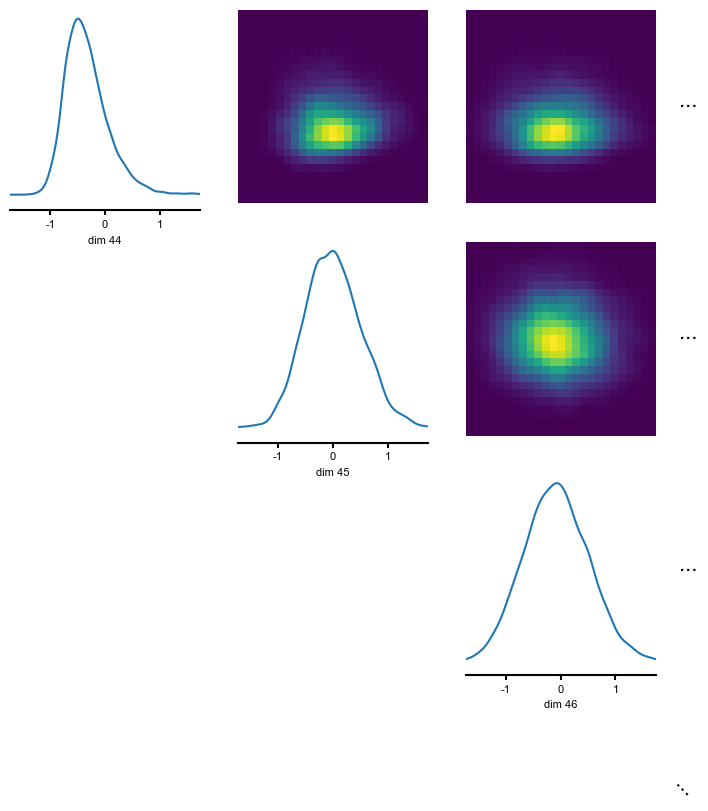

In [48]:
samples_MAF_ = samples_MAF_27[:5000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(
        pdfs=[posterior_MAF_27],
        samples=[samples_MAF_],
                           subset=[43,44,45],
                           limits=lims,
                           #ticks=lims,
                           #tick_labels=all_labels,
                           fig_size=(17.0*0.49,17.0*0.49),
                           #labels=labels_,
                           #points=[start_point, end_point],
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           #points_offdiag={'marker':'o', 'markeredgecolor':'w', 'markersize':3.6, 'markeredgewidth':0.5, 'path_effects':[pe.Stroke(linewidth=1.2, foreground='k'), pe.Normal()]},
                           #points_colors=[col['GT'], col['CONSISTENT1']],
                           #samples_colors=[col['SNPE'], 'white'],
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50})
                           #plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]}),

    plt.show()

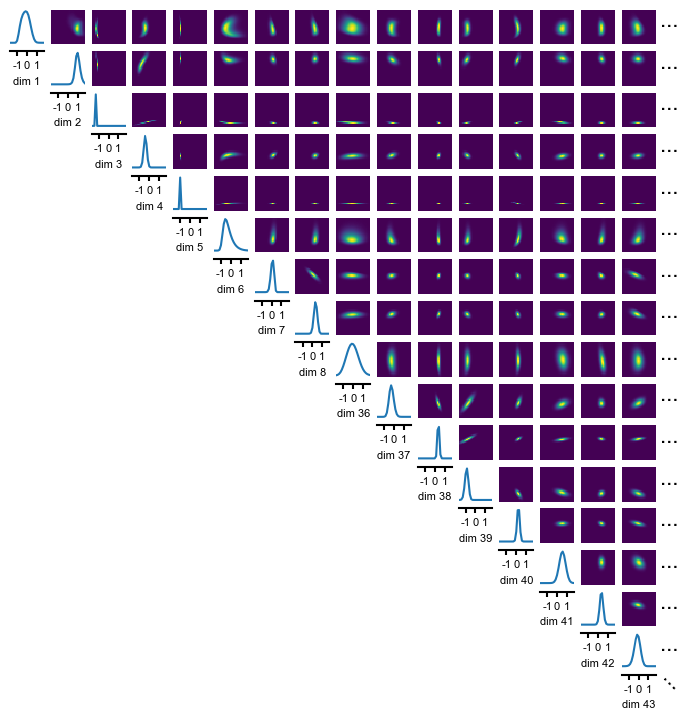

In [28]:
samples_MAF_ = samples_MAF_27[:5000]

with mpl.rc_context(fname='../matplotlibrc.txt'):
    fig, axes = samples_nd(
        pdfs=[posterior_MAF_27],
        samples=[samples_MAF_],
                           subset=[0,1,2,3,4,5,6,7, 35,36,37,38,39,40,41,42],
                           limits=lims,
                           #ticks=lims,
                           #tick_labels=all_labels,
                           fig_size=(17.0*0.49,17.0*0.49),
                           #labels=labels_,
                           #points=[start_point, end_point],
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           #points_offdiag={'marker':'o', 'markeredgecolor':'w', 'markersize':3.6, 'markeredgewidth':0.5, 'path_effects':[pe.Stroke(linewidth=1.2, foreground='k'), pe.Normal()]},
                           #points_colors=[col['GT'], col['CONSISTENT1']],
                           #samples_colors=[col['SNPE'], 'white'],
                           diag=['cond'],
                           upper=['cond'],
                           condition=[samples_MAF_27[0]],
                           hist_offdiag={'bins':30})
                           #plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]}),

    plt.show()